# ***The Spark Foundation***

## **Task 2: Prediction using Unsupervised ML**

#### **Dataset Link: https://bit.ly/3kXTdox**

#### **Name of the Author: Sayali Redasani**

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.describe(include='O')

,Species
count,150
unique,3
top,Iris-setosa
freq,50


In [9]:
df.shape

(150, 6)

In [10]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
#Categorical value to numerical value
iris_encoded = pd.get_dummies(df, columns = ["Species"])

In [12]:
iris_encoded.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0
5,6,5.4,3.9,1.7,0.4,1,0,0
6,7,4.6,3.4,1.4,0.3,1,0,0
7,8,5.0,3.4,1.5,0.2,1,0,0
8,9,4.4,2.9,1.4,0.2,1,0,0
9,10,4.9,3.1,1.5,0.1,1,0,0


In [13]:
print(iris_encoded.corr())

                                   Id  SepalLengthCm  SepalWidthCm  \
Id                       1.000000e+00       0.716676     -0.397729   
SepalLengthCm            7.166763e-01       1.000000     -0.109369   
SepalWidthCm            -3.977288e-01      -0.109369      1.000000   
PetalLengthCm            8.827473e-01       0.871754     -0.420516   
PetalWidthCm             8.997586e-01       0.817954     -0.356544   
Species_Iris-setosa     -8.165147e-01      -0.717416      0.595601   
Species_Iris-versicolor -3.481012e-18       0.079396     -0.464700   
Species_Iris-virginica   8.165147e-01       0.638020     -0.130901   

                         PetalLengthCm  PetalWidthCm  Species_Iris-setosa  \
Id                            0.882747      0.899759            -0.816515   
SepalLengthCm                 0.871754      0.817954            -0.717416   
SepalWidthCm                 -0.420516     -0.356544             0.595601   
PetalLengthCm                 1.000000      0.962757         

<Axes: >

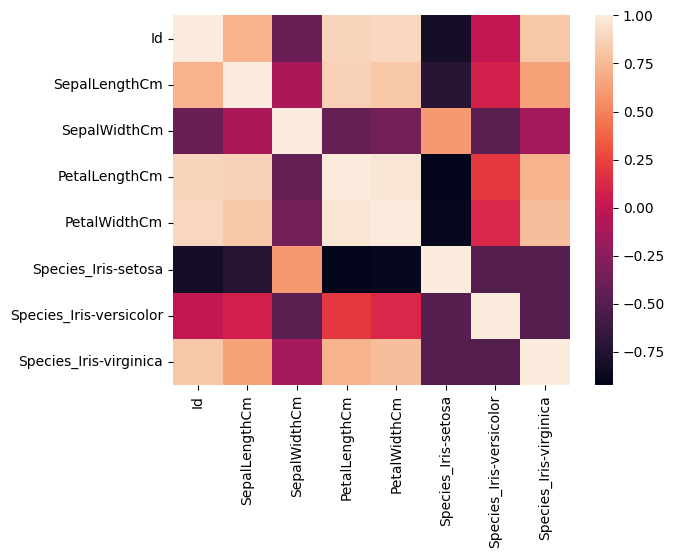

In [14]:
sns.heatmap(iris_encoded.corr())

In [15]:
!pip install chart-studio

In [16]:
# import matplotlib_venn as venn
from math import pi
# from pandas.tools.plotting import parallel_coordinates
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

#### Data Visualization

In [17]:
# import data again
data = pd.read_csv("Iris.csv")
# data of iris setosa
iris_setosa = data[data.Species == "Iris-setosa"]
# # data of iris virginica
iris_virginica = data[data.Species == "Iris-virginica"]
# data of iris versicolor
iris_versicolor = data[data.Species == 'Iris-versicolor']



# trace1 =  iris setosa
trace1 = go.Scatter3d(
    x=iris_setosa.SepalLengthCm,
    y=iris_setosa.SepalWidthCm,
    z=iris_setosa.PetalLengthCm,
    mode='markers',
    name = "iris_setosa",
    marker=dict(
        color='rgb(0, 0, 255)',
        size=5,
        line=dict(
            color='rgb(255, 255, 255)',
            width=0.1
        )
    )
)
# trace2 =  iris virginica
trace2 = go.Scatter3d(
    x=iris_virginica.SepalLengthCm,
    y=iris_virginica.SepalWidthCm,
    z=iris_virginica.PetalLengthCm,
    mode='markers',
    name = "iris_virginica",
    marker=dict(
        color='rgb(54, 170, 127)',
        size=5,
        line=dict(
            color='rgb(204, 204, 204)',
            width=0.1
        )
    )
)

# trace3 =  iris versicolor
trace3 = go.Scatter3d(
    x=iris_versicolor.SepalLengthCm,
    y=iris_versicolor.SepalWidthCm,
    z=iris_versicolor.PetalLengthCm,
    mode='markers',
    name = "iris_versicolor",
    marker=dict(
        color='rgb(255, 165, 0)',
        size=5,
        line=dict(
            color='rgb(54, 117, 244)',
            width=0.1
        )
    )
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title = ' 3D iris_setosa and iris_virginica',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Text(0.5, 1.0, 'Sepal Length vs. Sepal Width')

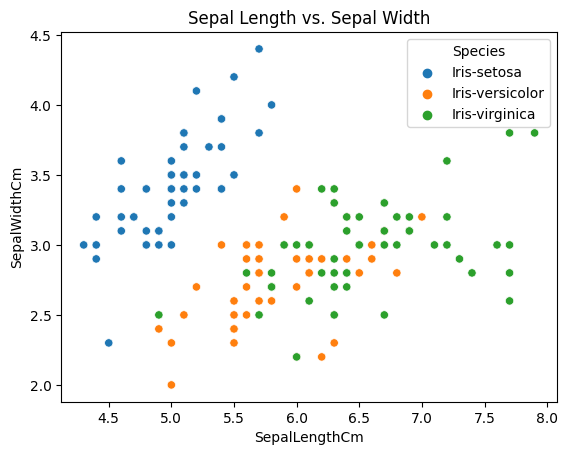

In [18]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df)
plt.title('Sepal Length vs. Sepal Width')

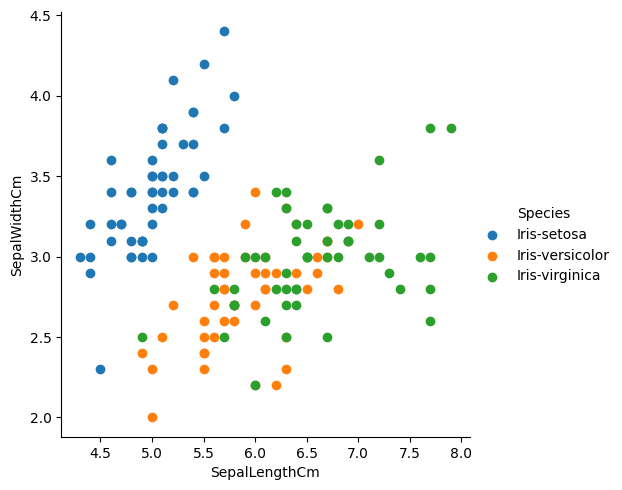

In [19]:
sns.FacetGrid(df, hue="Species", height = 5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

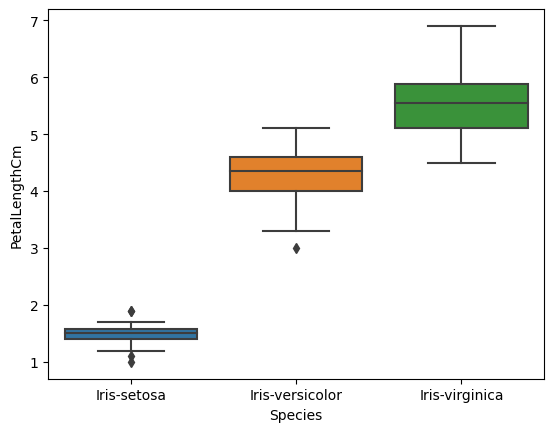

In [20]:
#Outliers Visualization
sns.boxplot(x="Species", y="PetalLengthCm", data=df)

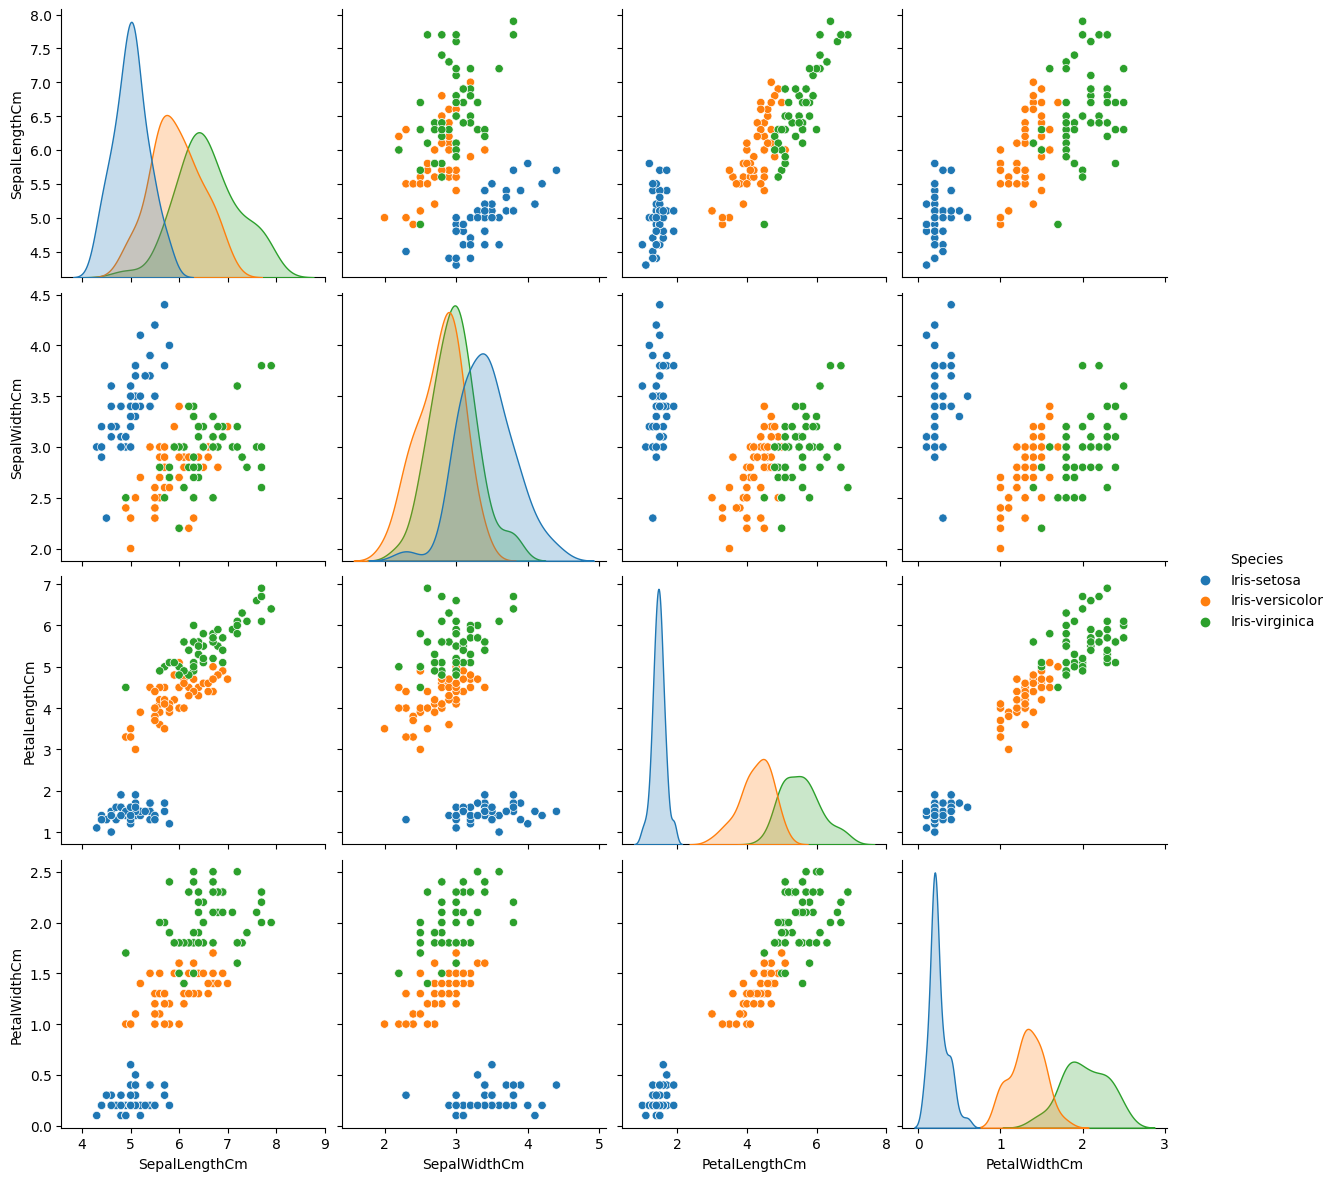

In [21]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
#
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(df.drop("Id", axis=1), hue="Species", size=3)

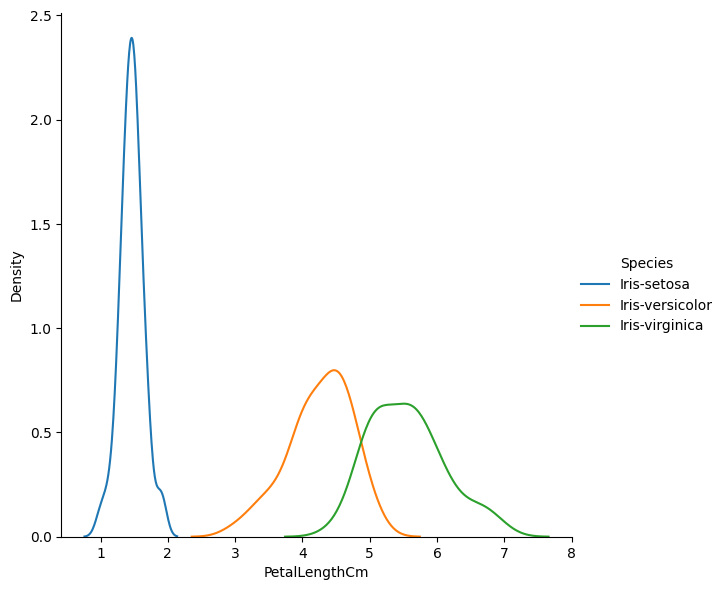

In [22]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(df, hue="Species", height=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

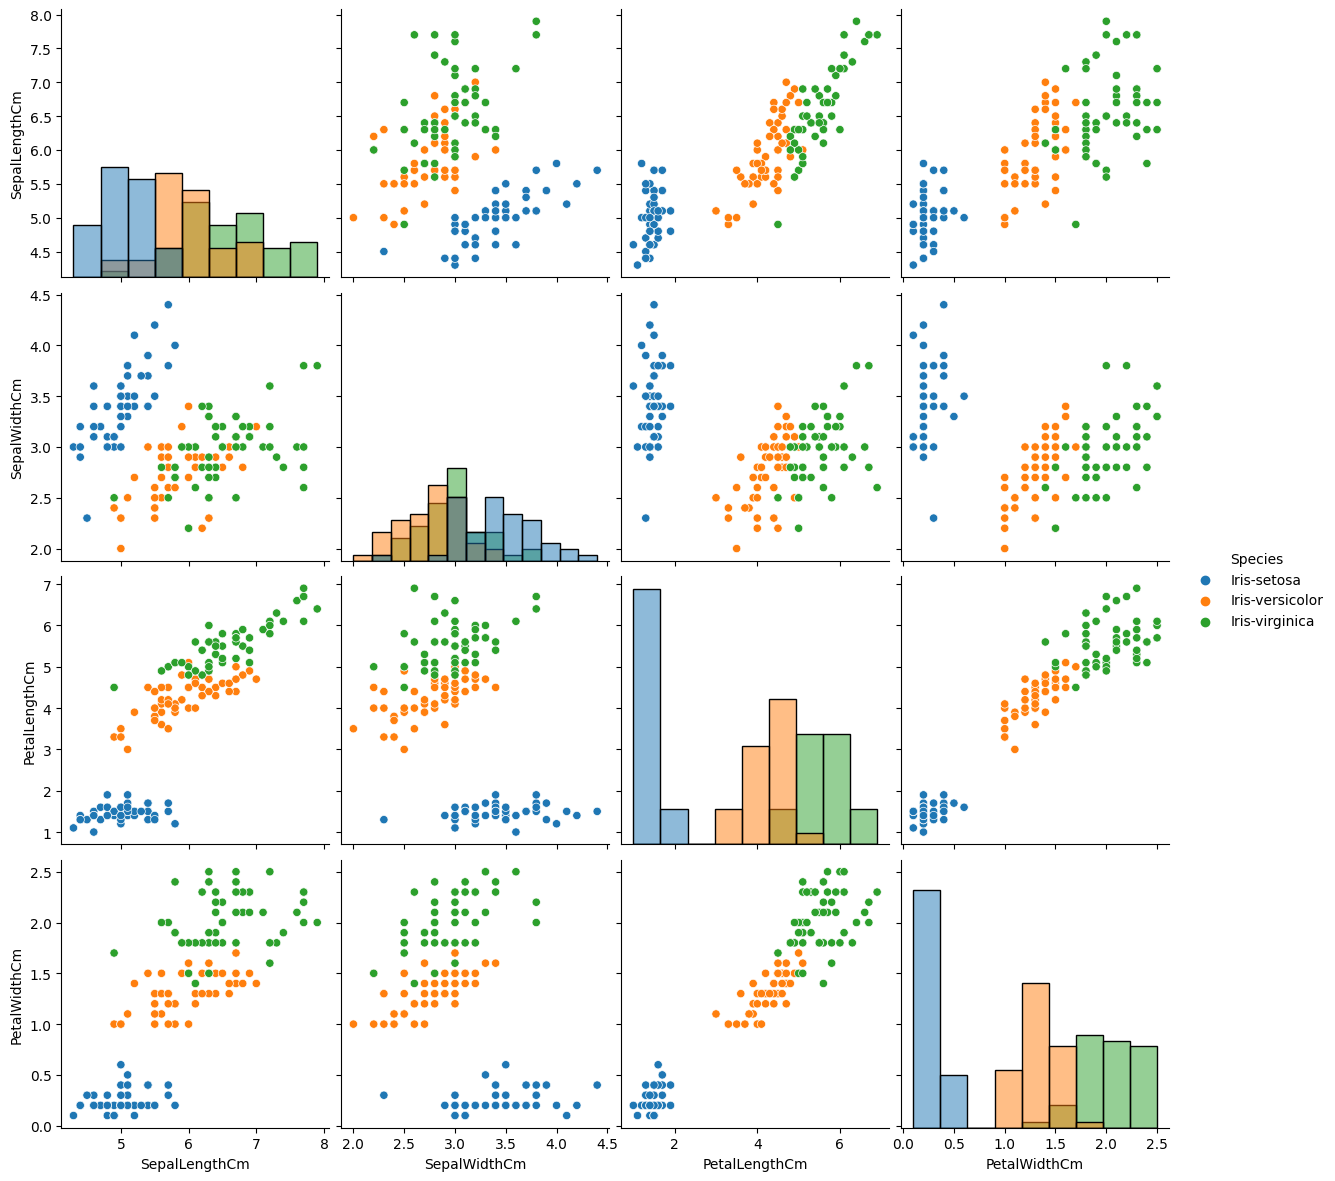

In [23]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(df.drop("Id", axis=1), hue="Species", height=3, diag_kind="hist")

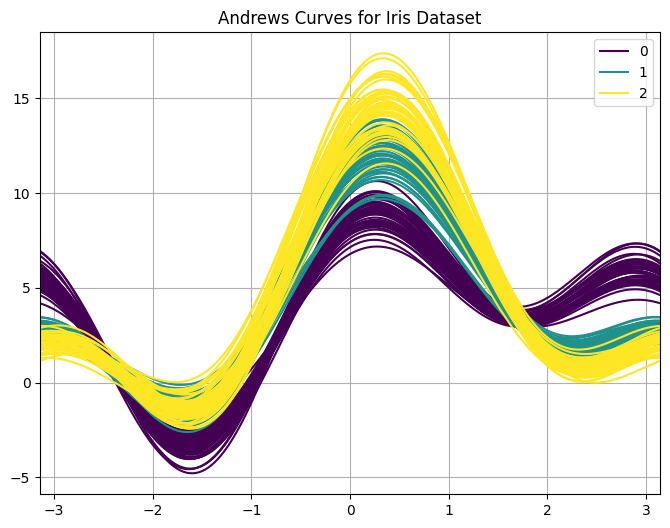

In [24]:
from pandas.plotting import andrews_curves

from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target

# Convert the dataset to a Pandas DataFrame
iris_df = pd.DataFrame(data, columns=iris.feature_names)
iris_df["Species"] = target

# Plot Andrews Curves
plt.figure(figsize=(8, 6))
andrews_curves(iris_df, "Species", colormap='viridis')
plt.title("Andrews Curves for Iris Dataset")
plt.show()

In [25]:
import plotly.express as px

fig = px.scatter_3d(df, x='SepalLengthCm', y='SepalWidthCm', z='PetalLengthCm',
              color='Species')
fig.show()

In [26]:
index_vals = df['Species'].astype('category').cat.codes

fig = go.Figure(data=go.Splom(
                dimensions=[dict(label='sepal length',
                                 values=df['SepalLengthCm']),
                            dict(label='sepal width',
                                 values=df['SepalWidthCm']),
                            dict(label='petal length',
                                 values=df['PetalLengthCm']),
                            dict(label='petal width',
                                 values=df['PetalWidthCm'])],
                showupperhalf=False,
                diagonal=dict(visible=False),
                text=df['Species'],
                marker=dict(color=index_vals,
                            showscale=True,
                            line_color='white',
                            line_width=0.5
                           )
))

fig.update_layout(title="<b>Pair plot: Iris Data set<b>",
                  titlefont={'size': 28, 'family':'Courier New'},
                  template='simple_white',
                  paper_bgcolor='lightgray',
                  plot_bgcolor='lightgray',
                  width=700,
                  height=700,)

fig.show()

In [27]:
fig = px.scatter_3d(df, x='SepalLengthCm', y='SepalWidthCm', z='PetalWidthCm',
                    color='Species')
fig.update_layout(title='<b>3D: The Legendary Iris Dataset <b>',
                  titlefont=dict({'size':28, 'family': 'Courier New'}),
                  template='plotly',
                  paper_bgcolor='lightgray',
                  width=750, height=550,
                 )
fig.update_layout(scene = dict(
                    xaxis = dict(
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="black",),
                    yaxis = dict(
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="black"),
                    zaxis = dict(
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="black"),
                              ),
                  )
fig.show()

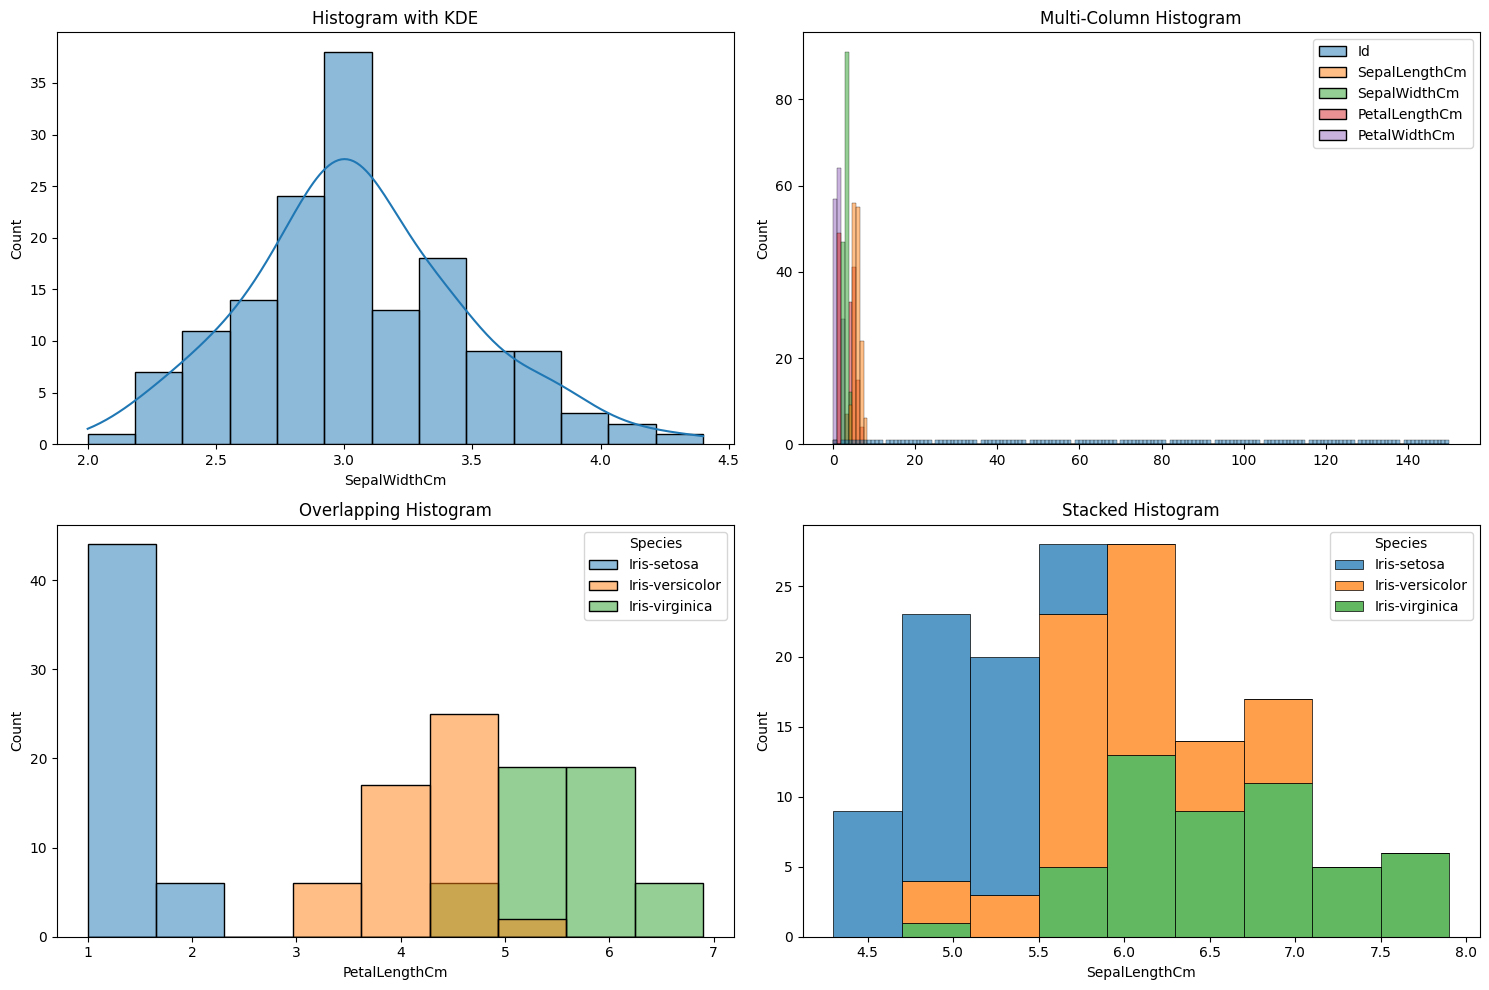

In [28]:
f, ax = plt.subplots(2,2,figsize=(15,10))

# Histogram with KDE
sns.histplot(data=df, x='SepalWidthCm',
             kde=True, ax=ax[0,0])
ax[0,0].set_title('Histogram with KDE')

# Histogram with multiple features
sns.histplot(data=df, ax=ax[0,1])
ax[0,1].set_title('Multi-Column Histogram')

#Overlapping Histogram
sns.histplot(data=df, x='PetalLengthCm',
             hue='Species', ax=ax[1,0])
ax[1,0].set_title('Overlapping Histogram')

#Stacked Histogram
sns.histplot(df, x='SepalLengthCm', hue='Species', multiple='stack',
             linewidth=0.5, ax=ax[1,1])
ax[1,1].set_title('Stacked Histogram')


plt.tight_layout()
plt.show()

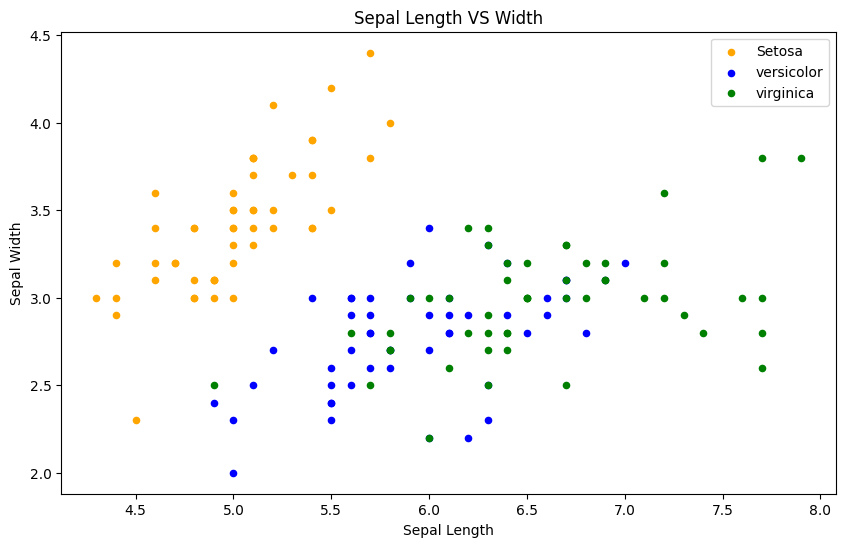

In [29]:
fig = df[df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

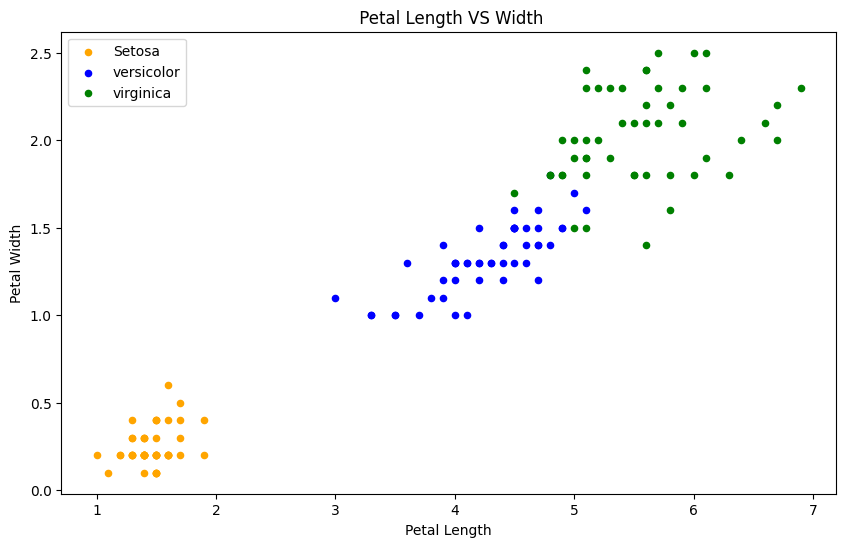

In [30]:
fig = df[df.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

## Elbow method to know optimum number of clusters.

In [31]:
# Calculating the within-cluster sum of square

within_cluster_sum_of_square = []

clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(iris_df)
    within_cluster_sum_of_square.append(km.inertia_)

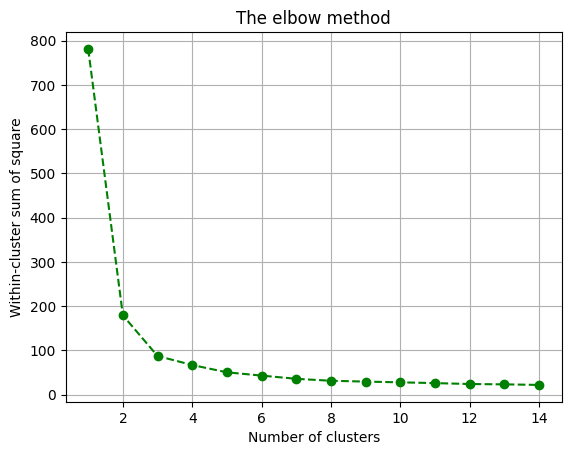

In [32]:
# Plotting the "within-cluster sum of square" against clusters range

plt.plot(clusters_range, within_cluster_sum_of_square, 'go--', color='green')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

From the above graph visualization we choose number of clusters as 3.

#### Applying KMeans clustering

In [33]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(iris_df)

#### Visualization of the clusters

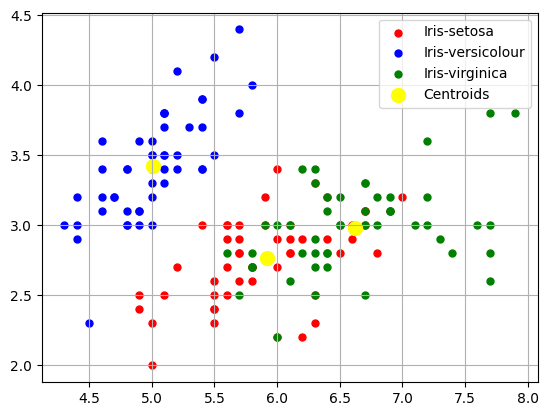

In [34]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 25, c = 'green', label = 'Iris-virginica')

# Plotting the cluster centers

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()